El estudio a continuación se realizará sobre la información relacionada con los registros del consumo de datos de la muestra original debido a un primer enfoque a predecir consumo de datos en un intervalo de tiempo. 

## Descripción de los datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#### Análisis de la estructura de los datos

In [10]:
df = pd.read_csv('../data/datos_completados.csv')

print("="*50)
print("ANÁLISIS INICIAL DEL DATASET")
print("="*50)

print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nTipos de variables por columna:")
print(df.dtypes.value_counts())

ANÁLISIS INICIAL DEL DATASET
Dimensiones del dataset: 7875 filas x 167 columnas

Tipos de variables por columna:
object     85
int64      67
float64    15
Name: count, dtype: int64


#### Proporción de variables numéricas vs categóricas

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nPROPORCIÓN DE VARIABLES:")
print(f"Numéricas: {len(numeric_cols)} ({len(numeric_cols)/df.shape[1]*100:.1f}%)")
print(f"Categóricas: {len(categorical_cols)} ({len(categorical_cols)/df.shape[1]*100:.1f}%)")


PROPORCIÓN DE VARIABLES:
Numéricas: 82 (49.1%)
Categóricas: 85 (50.9%)


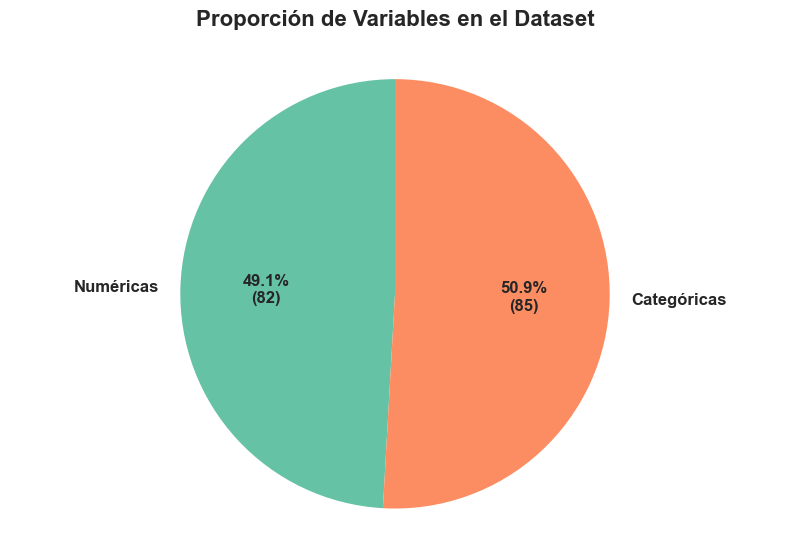

In [12]:
# Obtener las variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular los valores para el gráfico
numeric_count = len(numeric_cols)
categorical_count = len(categorical_cols)
total_columns = df.shape[1]

numeric_percentage = (numeric_count / total_columns) * 100
categorical_percentage = (categorical_count / total_columns) * 100

data = {
    'Tipo': ['Numéricas', 'Categóricas'],
    'Cantidad': [numeric_count, categorical_count],
    'Porcentaje': [numeric_percentage, categorical_percentage]
}

df_plot = pd.DataFrame(data)

# Crear el pie chart con seaborn style
colors = sns.color_palette("Set2")
plt.pie(df_plot['Cantidad'], 
        labels=df_plot['Tipo'], 
        colors=colors,
        autopct=lambda p: f'{p:.1f}%\n({int(p * total_columns / 100)})',
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Proporción de Variables en el Dataset\n', 
          fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Información General

In [13]:
print(f"\nINFORMACIÓN GENERAL:")
df.info()


INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Columns: 167 entries, CDR_ID to Deducted_units
dtypes: float64(15), int64(67), object(85)
memory usage: 10.0+ MB


#### Análisis de valores nulos

In [14]:
print(f"\nANÁLISIS DE VALORES NULOS:")
null_analysis = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_summary = pd.DataFrame({
    'Valores_Nulos': null_analysis,
    'Porcentaje': null_percentage
})
print(null_summary[null_summary['Valores_Nulos'] > 0])


ANÁLISIS DE VALORES NULOS:
Empty DataFrame
Columns: [Valores_Nulos, Porcentaje]
Index: []


#### Estadísticas descriptivas

In [15]:
if len(numeric_cols) > 0:
    print(f"\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:")
    print(df[numeric_cols].describe())
    
    # Análisis de skewness (asimetría)
    print(f"\nANÁLISIS DE ASIMETRÍA (SKEWNESS):")
    for col in numeric_cols:
        skew_val = df[col].skew()
        interpretation = "Simétrica" if abs(skew_val) < 0.5 else "Moderadamente asimétrica" if abs(skew_val) < 1 else "Muy asimétrica"
        print(f"{col}: {skew_val:.3f} ({interpretation})")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:
             CDR_ID  CDR_SUB_ID  STD_EVT_TYPE_ID        OBJ_ID  OWNER_CUST_ID  \
count  7.875000e+03      7875.0           7875.0  7.875000e+03   7.875000e+03   
mean   7.016895e+17         0.0          11007.0  1.011320e+17   1.011319e+17   
std    7.082965e+14         0.0              0.0  6.843182e+14   6.843182e+14   
min    7.010001e+17         0.0          11007.0  1.000000e+17   1.000000e+17   
25%    7.010001e+17         0.0          11007.0  1.005300e+17   1.005300e+17   
50%    7.020001e+17         0.0          11007.0  1.011201e+17   1.011200e+17   
75%    7.020001e+17         0.0          11007.0  1.017100e+17   1.017100e+17   
max    7.030001e+17         0.0          11007.0  1.023301e+17   1.023301e+17   

       PRI_IDENTITY  DEFAULT_ACCT_ID  BILL_CYCLE_ID  SERVICE_CATEGORY  \
count  7.875000e+03     7.875000e+03         7875.0            7875.0   
mean   4.993493e+17     1.011320e+17     20251001.0               5.0   
s

#### Análisis de variables categóricas

In [16]:
if len(categorical_cols) > 0:
    print(f"\nANÁLISIS DE VARIABLES CATEGÓRICAS:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Valores únicos: {df[col].nunique()}")
        print(f"  Top 5 valores más frecuentes:")
        print(df[col].value_counts().head())


ANÁLISIS DE VARIABLES CATEGÓRICAS:

START_DATE:
  Valores únicos: 5756
  Top 5 valores más frecuentes:
START_DATE
10/01/2025 04:24:39    9
10/01/2025 09:02:05    6
10/01/2025 10:07:14    6
10/01/2025 10:47:13    5
10/01/2025 04:11:37    5
Name: count, dtype: int64

END_DATE:
  Valores únicos: 5629
  Top 5 valores más frecuentes:
END_DATE
10/01/2025 10:12:07    8
10/01/2025 11:22:25    6
10/01/2025 10:46:18    6
10/01/2025 11:20:34    6
10/01/2025 10:08:05    6
Name: count, dtype: int64

OBJ_TYPE:
  Valores únicos: 1
  Top 5 valores más frecuentes:
OBJ_TYPE
S    7875
Name: count, dtype: int64

FREE_UNIT_CHG_LIST:
  Valores únicos: 7875
  Top 5 valores más frecuentes:
FREE_UNIT_CHG_LIST
SIN2P4    1
BONVPQ    1
XGOLLZ    1
2DII8I    1
RS401I    1
Name: count, dtype: int64

BALANCE_CHG_LIST:
  Valores únicos: 7875
  Top 5 valores más frecuentes:
BALANCE_CHG_LIST
WEGGD0    1
ZX4ZUR    1
JLQM2S    1
MXR5RJ    1
DQBR77    1
Name: count, dtype: int64

FLOW_TYPE:
  Valores únicos: 1
  Top 5 va

## Análisis de Correlación

In [17]:
# Seleccionar solo las columnas numéricas para la correlación
df_numeric = df.select_dtypes(include=[np.number])

print(f"\nColumnas numéricas encontradas: {len(df_numeric.columns)}")
print("Columnas numéricas:", df_numeric.columns.tolist())

# Crear matriz de correlación
correlation_matrix = df_numeric.corr()

# Guardar la matriz de correlación en un archivo CSV
correlation_matrix.to_csv('matriz_correlacion.csv')
print("\nMatriz de correlación guardada en 'matriz_correlacion.csv'")


Columnas numéricas encontradas: 82
Columnas numéricas: ['CDR_ID', 'CDR_SUB_ID', 'STD_EVT_TYPE_ID', 'OBJ_ID', 'OWNER_CUST_ID', 'PRI_IDENTITY', 'DEFAULT_ACCT_ID', 'BILL_CYCLE_ID', 'SERVICE_CATEGORY', 'USAGE_SERVICE_TYPE', 'ACTUAL_USAGE', 'RATING_USAGE', 'USAGE_MEASURE_UNIT', 'FREE_UNIT_USAGE', 'FREE_UNIT_MEASURE_UNIT', 'ACTUAL_CHARGE', 'TOTAL_TAX_AMOUNT', 'CHARGE_CURRENCY_ID', 'RESERVE3', 'RESERVE8', 'RESERVE10', 'RECHARGE_CARD_INFO', 'CDR_ID.1', 'CDR_SUB_ID.1', 'PAY_ACCT_ID', 'PAY_OBJECT_ID', 'PAY_OBJECT_TYPE_ID', 'CHARGE_CODE', 'OFFERING_ID', 'PLAN_ID', 'DEDUCT_CHARGE_AMOUNT', 'TAX_AMOUNT1', 'TAX_AMOUNT2', 'TAX_AMOUNT3', 'CHARGE_CURRENCY_ID.1', 'PAY_CURRENCY_ID', 'CUST_ID', 'BILL_CYCLE_ID.1', 'CP_BILL_CYCLE_ID', 'CallingPartyNumber', 'CallingPartyIMSI', 'CallingCellID', 'TotalFlux', 'UpFlux', 'DownFlux', 'IMEI', 'ServiceID', 'SPID', 'CategoryID', 'ContentID', 'ChargingID', 'TransitionID', 'BrandID', 'MainOfferingID', 'ChargingPartyNumber', 'PayType', 'ChargingType', 'RoamState', 'Call

### Variables correlacionadas (con valor de correlación de [0.7, 1] y [-0.7, -1])

In [18]:
# Crear lista de pares de correlaciones (excluyendo la diagonal y duplicados)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Solo j < i (parte inferior)
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_value) and abs(corr_value) >= 0.7:
            corr_pairs.append({
                'Variable1': col1,
                'Variable2': col2,
                'Correlación': corr_value,
                'Abs_Correlación': abs(corr_value)
            })

# Convertir a DataFrame y ordenar por valor absoluto
corr_df = pd.DataFrame(corr_pairs)
corr_df_sorted = corr_df.sort_values('Abs_Correlación', ascending=False)

print("\nCorrelaciones más fuertes:")
print(corr_df_sorted.to_string(index=False))

# Guardar análisis de correlaciones
corr_df_sorted.to_csv('analisis_correlaciones.csv', index=False)
print("\nAnálisis completo de correlaciones guardado en 'analisis_correlaciones.csv'")

variables = []

for dictionary in corr_pairs:
    variables.append(dictionary['Variable1'])
    variables.append(dictionary['Variable2'])
    
variables = set(variables)
print(variables)


Correlaciones más fuertes:
      Variable1     Variable2  Correlación  Abs_Correlación
   RATING_USAGE  ACTUAL_USAGE     1.000000         1.000000
DEFAULT_ACCT_ID        OBJ_ID     1.000000         1.000000
DEFAULT_ACCT_ID OWNER_CUST_ID     1.000000         1.000000
  OWNER_CUST_ID        OBJ_ID     1.000000         1.000000
         OBJ_ID        CDR_ID     0.913608         0.913608
DEFAULT_ACCT_ID        CDR_ID     0.913608         0.913608
  OWNER_CUST_ID        CDR_ID     0.913607         0.913607

Análisis completo de correlaciones guardado en 'analisis_correlaciones.csv'
{'DEFAULT_ACCT_ID', 'OWNER_CUST_ID', 'OBJ_ID', 'ACTUAL_USAGE', 'RATING_USAGE', 'CDR_ID'}


## Análisis sobre reducción de dimensionalidad y ruido

Para reducir la dimensionalidad del espacio y el posible ruido utilizaremos dos técnicas: 

- Análisis de Componentes Principales (PCA) 

- Análisis de Componentes Independientes (ICA)

Para verificar cuál fue más efectiva haremos una comparación de cómo se comportó el algoritmo de aprendizae de máquinas seleccionado con ambas reducciones en un estudio posterior.

### Análisis de Componentes Principales (PCA)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

Estrategia: eliminar variables con muchos missing values y imputar el resto

Eliminar columnas con más del 50% de valores faltantes

In [20]:
threshold = len(df_numeric) * 0.5
df_clean = df_numeric.dropna(axis=1, thresh=threshold)

print(f"\nDespués de eliminar variables con >50% missing: {df_clean.shape}")


Después de eliminar variables con >50% missing: (7875, 82)


Imputar valores faltantes restantes con la mediana

In [21]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), 
                         columns=df_clean.columns)

print(f"Después de imputación: {df_imputed.shape}")

Después de imputación: (7875, 82)


#### Estandarización de los datos

In [22]:
print("\nEstandarizando datos...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)


Estandarizando datos...


#### Aplicar PCA

In [23]:
print("\nAplicando PCA...")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


Aplicando PCA...


#### Análisis de varianza explicada

In [24]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Visualizar varianza explicada

In [25]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Varianza explicada por componente

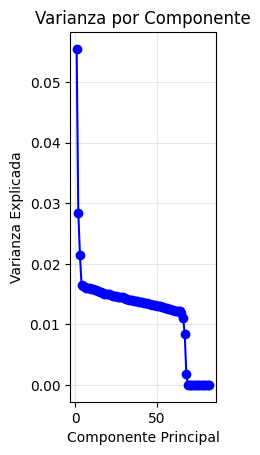

In [26]:
plt.subplot(1, 3, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza por Componente')
plt.grid(True, alpha=0.3)

Varianza acumulada

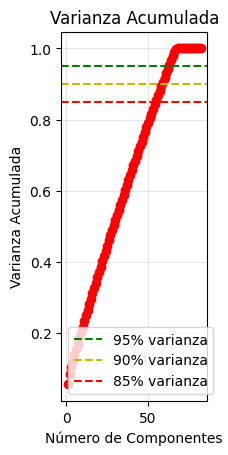

In [27]:
plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% varianza')
plt.axhline(y=0.90, color='y', linestyle='--', label='90% varianza')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% varianza')
plt.legend()
plt.grid(True, alpha=0.3)

Scree plot

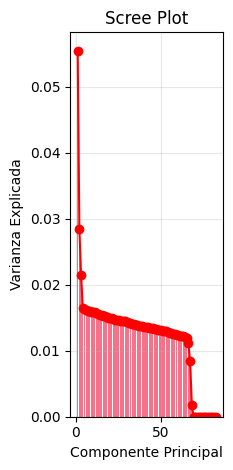

In [28]:
plt.subplot(1, 3, 3)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'ro-')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Scree Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Encontrar el número óptimo de componentes

In [29]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

print(f"\nNúmero de componentes para:")
print(f"95% de varianza: {n_components_95}")
print(f"90% de varianza: {n_components_90}")
print(f"85% de varianza: {n_components_85}")


Número de componentes para:
95% de varianza: 63
90% de varianza: 59
85% de varianza: 55


#### Aplicar PCA con número óptimo de componentes

In [30]:
n_components_optimo = n_components_90
print(f"\nAplicando PCA con {n_components_optimo} componentes...")

pca_optimo = PCA(n_components=n_components_optimo)
X_pca_optimo = pca_optimo.fit_transform(X_scaled)

print(f"Dimensionalidad reducida: {X_pca_optimo.shape}")
print(f"Varianza total explicada: {pca_optimo.explained_variance_ratio_.sum():.4f}")


Aplicando PCA con 59 componentes...
Dimensionalidad reducida: (7875, 59)
Varianza total explicada: 0.9056


#### Análisis de componentes - coeficientes de las componentes

In [31]:
loadings = pd.DataFrame(
    pca_optimo.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components_optimo)],
    index=df_imputed.columns
)

print("\nVariables más importantes en cada componente:")
for i in range(min(3, n_components_optimo)):
    print(f"\nComponente PC{i+1}:")
    top_vars = loadings[f'PC{i+1}'].abs().sort_values(ascending=False).head(10)
    print(top_vars)


Variables más importantes en cada componente:

Componente PC1:
DEFAULT_ACCT_ID        0.498977
OWNER_CUST_ID          0.498977
OBJ_ID                 0.498977
CDR_ID                 0.476006
RESERVE8               0.125897
RESERVE10              0.070952
RESERVE3               0.046849
SPID                   0.016641
ChargingPartyNumber    0.015579
CategoryID             0.015340
Name: PC1, dtype: float64

Componente PC2:
ACTUAL_USAGE                0.697944
RATING_USAGE                0.697944
RESERVE10                   0.090739
RESERVE8                    0.048731
RESERVE3                    0.047418
ChargingID                  0.030530
CDR_ID.1                    0.029755
recordSeqNum                0.027877
RoamingZoneID               0.024979
CallingVPNTopGroupNumber    0.024966
Name: PC2, dtype: float64

Componente PC3:
RESERVE10          0.600992
RESERVE8           0.567274
RESERVE3           0.484759
RATING_USAGE       0.076971
ACTUAL_USAGE       0.076971
OBJ_ID             0

#### Visualización de los dos primeros componentes

In [32]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Gráfico de loadings para los primeros dos componentes

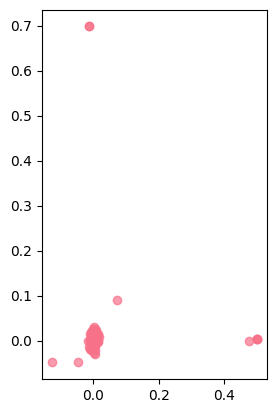

In [33]:
plt.subplot(1, 2, 1)
plt.scatter(loadings['PC1'], loadings['PC2'], alpha=0.7)

Añadir etiquetas para las variables más importantes

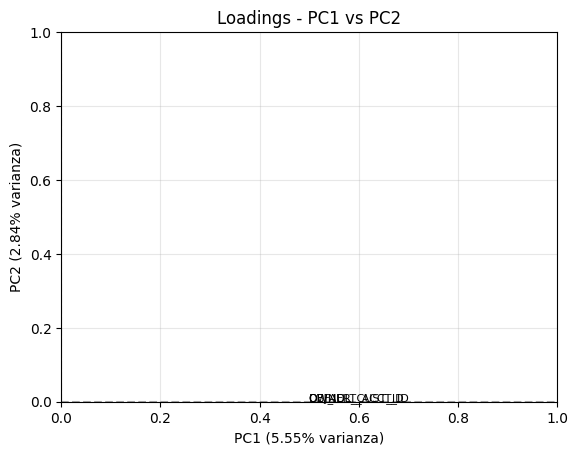

In [34]:
for idx, row in loadings.iterrows():
    if abs(row['PC1']) > 0.2 or abs(row['PC2']) > 0.2:
        plt.annotate(idx, (row['PC1'], row['PC2']), fontsize=8)

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} varianza)')
plt.title('Loadings - PC1 vs PC2')
plt.grid(True, alpha=0.3)

Gráfico de proyección de datos en los primeros dos componentes

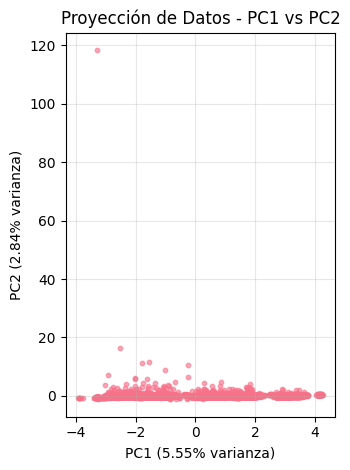

In [35]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca_optimo[:, 0], X_pca_optimo[:, 1], alpha=0.6, s=10)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} varianza)')
plt.title('Proyección de Datos - PC1 vs PC2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Crear el dataset reducido

In [36]:
df_pca = pd.DataFrame(
    X_pca_optimo,
    columns=[f'PC{i+1}' for i in range(n_components_optimo)]
)

print(f"\nDataset reducido creado: {df_pca.shape}")


Dataset reducido creado: (7875, 59)


#### Análisis de contribución de variables

In [37]:
variable_importance = pd.DataFrame({
    'variable': df_imputed.columns,
    'importance': np.sum(loadings.abs().values, axis=1)
}).sort_values('importance', ascending=False)

print("\nTop 20 variables más importantes en el PCA:")
print(variable_importance.head(20))


Top 20 variables más importantes en el PCA:
                 variable  importance
56           ChargingType    6.174669
76       USAGE_MEASURE_ID    6.149387
59  CallingRoamAreaNumber    6.147981
72           recordSeqNum    6.075378
69             RuleBaseID    6.062052
63  CallingVPNGroupNumber    6.016736
61          SpecialZoneID    5.997455
55                PayType    5.996531
41          CallingCellID    5.991471
42              TotalFlux    5.987333
37        BILL_CYCLE_ID.1    5.985132
49              ContentID    5.982119
66          RoamingZoneID    5.965263
26     PAY_OBJECT_TYPE_ID    5.961173
34   CHARGE_CURRENCY_ID.1    5.941647
28            OFFERING_ID    5.936362
46              ServiceID    5.934152
67   ChargePartyIndicator    5.922706
45                   IMEI    5.867456
23           CDR_SUB_ID.1    5.865137


In [38]:
# Guardar dataset reducido
df_pca.to_csv('dataset_reducido_pca.csv', index=False)

# Guardar información del PCA
pca_info = pd.DataFrame({
    'component': [f'PC{i+1}' for i in range(n_components_optimo)],
    'explained_variance': pca_optimo.explained_variance_ratio_,
    'cumulative_variance': np.cumsum(pca_optimo.explained_variance_ratio_)
})
pca_info.to_csv('informacion_pca.csv', index=False)

# Guardar loadings
loadings.to_csv('loadings_pca.csv')

print("\n✅ Análisis PCA completado!")
print(f"✅ Dimensionalidad reducida de {df_numeric.shape[1]} a {n_components_optimo} variables")
print(f"✅ Varianza explicada: {pca_optimo.explained_variance_ratio_.sum():.2%}")
print(f"✅ Archivos guardados:")
print("   - dataset_reducido_pca.csv")
print("   - informacion_pca.csv")
print("   - loadings_pca.csv")


✅ Análisis PCA completado!
✅ Dimensionalidad reducida de 82 a 59 variables
✅ Varianza explicada: 90.56%
✅ Archivos guardados:
   - dataset_reducido_pca.csv
   - informacion_pca.csv
   - loadings_pca.csv


### Análisis de Componentes Independientes (ICA)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from kneed import KneeLocator
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

Se vuelven a cargar los datos para trabajar nuevamente con el original

In [40]:
print("Cargando y preprocesando datos...")
df = pd.read_csv('../data/datos_completados.csv')

df_numeric = df.select_dtypes(include=[np.number])

print(f"Dataset original: {df.shape}")
print(f"Variables numéricas: {df_numeric.shape}")


Cargando y preprocesando datos...
Dataset original: (7875, 167)
Variables numéricas: (7875, 82)


In [41]:
print("\nManejando valores faltantes...")
print(f"Valores faltantes por variable:\n{df_numeric.isnull().sum().sort_values(ascending=False).head(10)}")

threshold = len(df_numeric) * 0.5
df_clean = df_numeric.dropna(axis=1, thresh=threshold)

print(f"\nDespués de eliminar variables con >50% missing: {df_clean.shape}")

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), 
                         columns=df_clean.columns)

print(f"Después de imputación: {df_imputed.shape}")

print("\nEstandarizando datos...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)


Manejando valores faltantes...
Valores faltantes por variable:
CDR_ID                   0
SpecialZoneID            0
CallingRoamAreaNumber    0
CallingHomeAreaNumber    0
RoamState                0
ChargingType             0
PayType                  0
ChargingPartyNumber      0
MainOfferingID           0
BrandID                  0
dtype: int64

Después de eliminar variables con >50% missing: (7875, 82)
Después de imputación: (7875, 82)

Estandarizando datos...


### Determinar el número óptimo de componentes para ICA

In [42]:
def find_optimal_ica_components(X, max_components=50):
    """
    Encuentra el número óptimo de componentes para ICA basado en la curtosis promedio
    """
    kurtosis_values = []
    component_range = range(2, min(max_components, X.shape[1]) + 1)
    
    for n_components in component_range:
        ica = FastICA(n_components=n_components, random_state=42, max_iter=1000)
        try:
            S = ica.fit_transform(X)
            kurt_vals = stats.kurtosis(S, axis=0)
            avg_kurtosis = np.mean(np.abs(kurt_vals))
            kurtosis_values.append(avg_kurtosis)
        except:
            kurtosis_values.append(0)
    
    return component_range, kurtosis_values

print("Buscando número óptimo de componentes...")
component_range, kurtosis_values = find_optimal_ica_components(X_scaled)

plt.figure(figsize=(15, 5))

Buscando número óptimo de componentes...


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

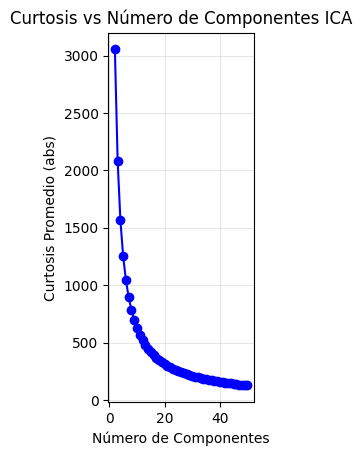

In [43]:
plt.subplot(1, 3, 1)
plt.plot(component_range, kurtosis_values, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Curtosis Promedio (abs)')
plt.title('Curtosis vs Número de Componentes ICA')
plt.grid(True, alpha=0.3)

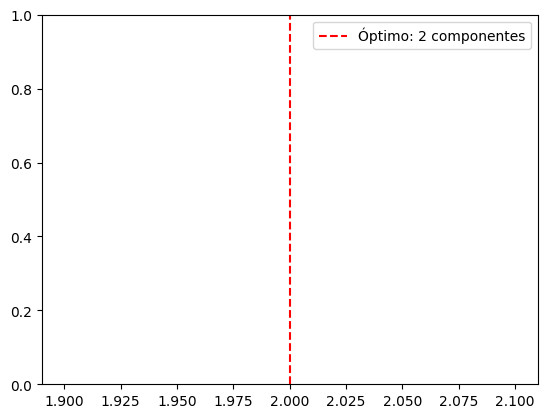

In [44]:
knee_finder = KneeLocator(component_range, kurtosis_values, curve='concave', direction='increasing')
n_components_optimo = knee_finder.knee

if n_components_optimo is None:
    n_components_optimo = min(20, X_scaled.shape[1] // 3)  # Valor por defecto

plt.axvline(x=n_components_optimo, color='red', linestyle='--', 
           label=f'Óptimo: {n_components_optimo} componentes')
plt.legend()

#### Aplicar ICA con el número óptimo de componentes

In [45]:
print(f"\nAplicando ICA con {n_components_optimo} componentes...")
ica = FastICA(n_components=n_components_optimo, random_state=42, max_iter=2000)
S = ica.fit_transform(X_scaled)  # Componentes independientes
A = ica.mixing_  # Matriz de mezcla

print(f"Forma de componentes independientes: {S.shape}")
print(f"Forma de matriz de mezcla: {A.shape}")


Aplicando ICA con 2 componentes...
Forma de componentes independientes: (7875, 2)
Forma de matriz de mezcla: (82, 2)


#### Análisis de los componentes independientes

In [46]:
component_stats = []
for i in range(S.shape[1]):
    component = S[:, i]
    component_stats.append({
        'Componente': f'IC{i+1}',
        'Media': np.mean(component),
        'Desviación': np.std(component),
        'Curtosis': stats.kurtosis(component),
        'Skewness': stats.skew(component)
    })

df_component_stats = pd.DataFrame(component_stats)
print("\nEstadísticas de los componentes independientes:")
print(df_component_stats)


Estadísticas de los componentes independientes:
  Componente         Media  Desviación     Curtosis   Skewness
0        IC1  1.172959e-17         1.0    -1.165385   0.168398
1        IC2  1.804553e-18         1.0  6105.077175  73.858378


Visualizar distribución de los componentes

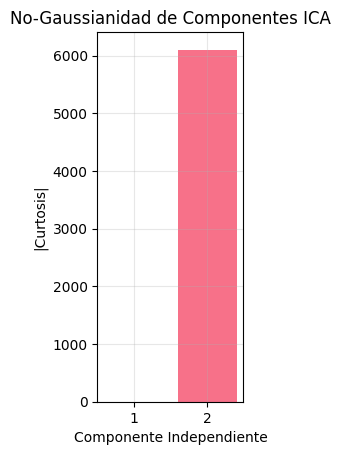

In [47]:
plt.subplot(1, 3, 2)
plt.bar(range(1, len(component_stats) + 1), [abs(cs['Curtosis']) for cs in component_stats])
plt.xlabel('Componente Independiente')
plt.ylabel('|Curtosis|')
plt.title('No-Gaussianidad de Componentes ICA')
plt.grid(True, alpha=0.3)

#### Análisis de la matriz de mezcla

In [48]:
loadings_ica = pd.DataFrame(
    A,
    columns=[f'IC{i+1}' for i in range(n_components_optimo)],
    index=df_imputed.columns
)

print("\nVariables más importantes en cada componente independiente:")
for i in range(min(3, n_components_optimo)):
    print(f"\nComponente IC{i+1}:")
    top_vars = loadings_ica[f'IC{i+1}'].abs().sort_values(ascending=False).head(10)
    print(top_vars)


Variables más importantes en cada componente independiente:

Componente IC1:
DEFAULT_ACCT_ID        0.990351
OWNER_CUST_ID          0.990350
OBJ_ID                 0.990350
CDR_ID                 0.944604
RESERVE8               0.251515
RESERVE10              0.143903
RESERVE3               0.094592
SPID                   0.033264
ChargingPartyNumber    0.030933
CategoryID             0.030418
Name: IC1, dtype: float64

Componente IC2:
ACTUAL_USAGE                0.992199
RATING_USAGE                0.992199
RESERVE10                   0.125532
RESERVE3                    0.065135
RESERVE8                    0.063236
ChargingID                  0.043606
CDR_ID.1                    0.042159
recordSeqNum                0.039707
RoamingZoneID               0.035482
CallingVPNTopGroupNumber    0.035192
Name: IC2, dtype: float64


#### Visualización de componentes

<Axes: >

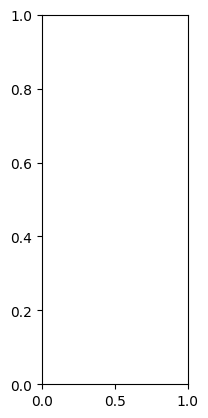

In [49]:
plt.subplot(1, 3, 3)

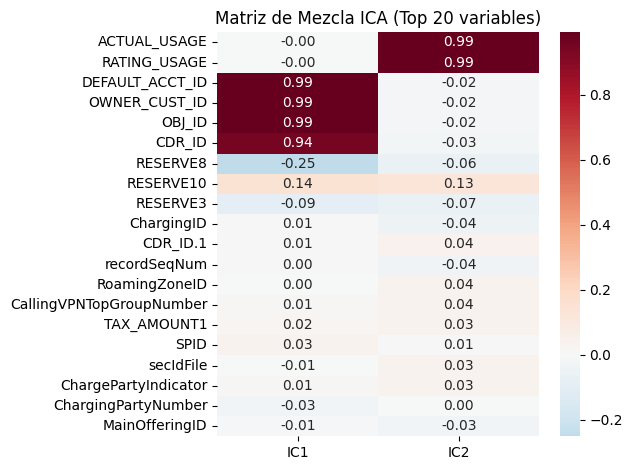

In [50]:
important_vars = loadings_ica.abs().max(axis=1).sort_values(ascending=False).head(20).index
loadings_subset = loadings_ica.loc[important_vars]

sns.heatmap(loadings_subset, cmap='RdBu_r', center=0, annot=True, fmt='.2f')
plt.title('Matriz de Mezcla ICA (Top 20 variables)')
plt.tight_layout()
plt.show()

#### VIsualización de distribuciones de componentes

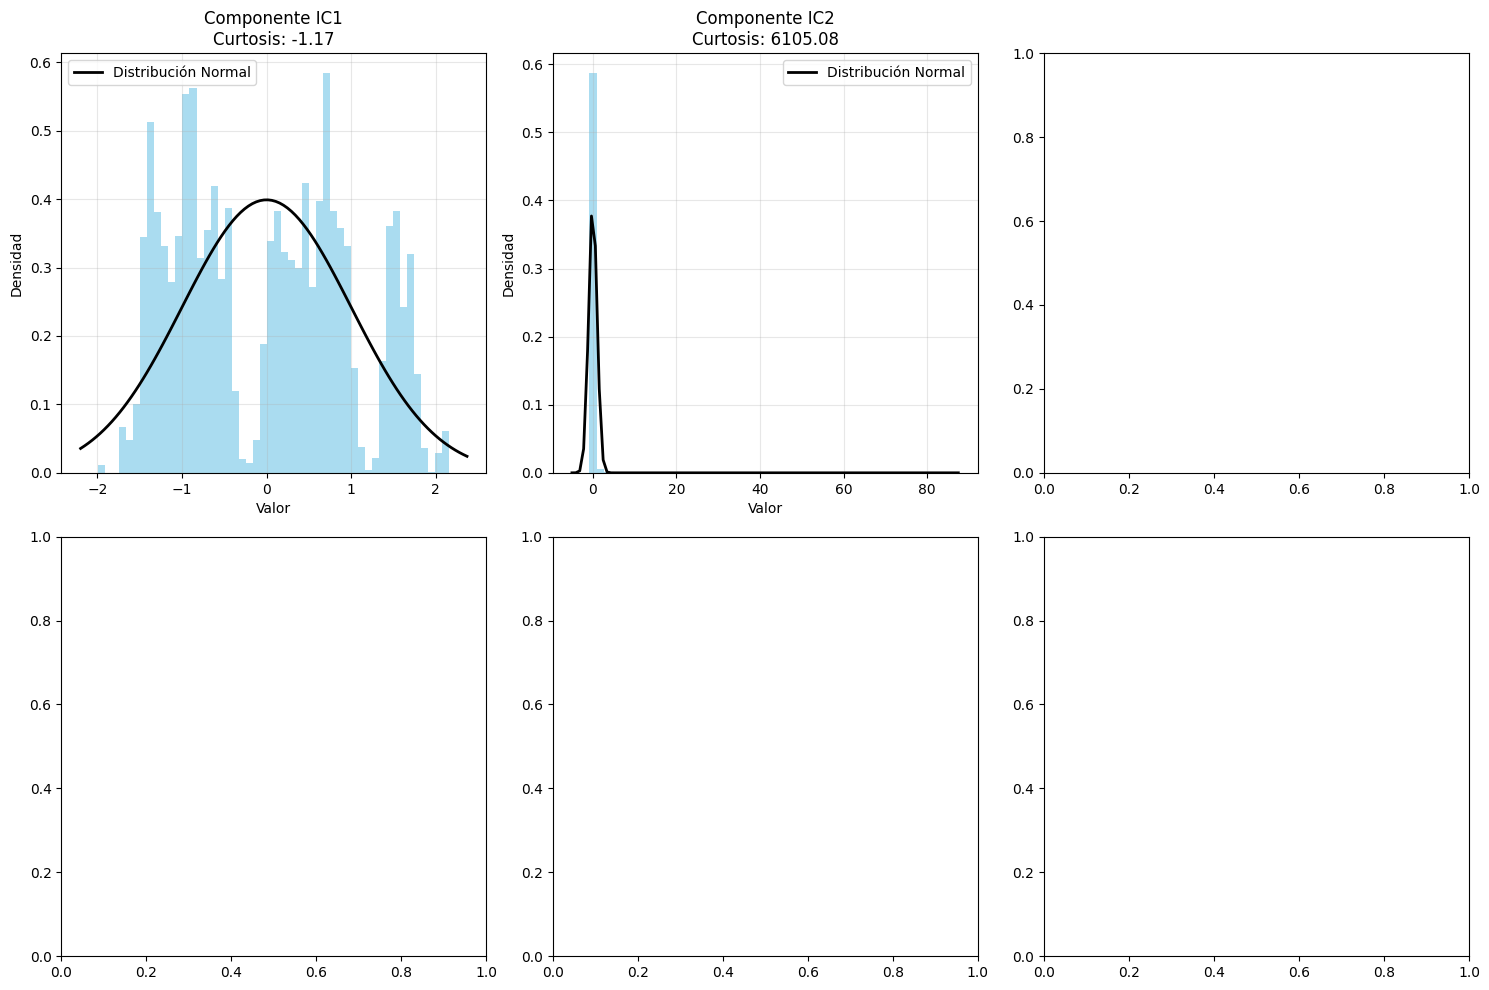

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i in range(min(6, n_components_optimo)):
    ax = axes[i]
    component = S[:, i]
    
    # Histograma y KDE
    ax.hist(component, bins=50, density=True, alpha=0.7, color='skyblue')
    
    # Añadir distribución normal para comparación
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(component), np.std(component))
    ax.plot(x, p, 'k', linewidth=2, label='Distribución Normal')
    
    ax.set_title(f'Componente IC{i+1}\nCurtosis: {stats.kurtosis(component):.2f}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Análisis de contribución de variables

In [52]:
variable_importance_ica = pd.DataFrame({
    'variable': df_imputed.columns,
    'importance': np.sum(loadings_ica.abs().values, axis=1)
}).sort_values('importance', ascending=False)

print("\nTop 20 variables más importantes en el ICA:")
print(variable_importance_ica.head(20))


Top 20 variables más importantes en el ICA:
                    variable  importance
3                     OBJ_ID    1.010395
6            DEFAULT_ACCT_ID    1.010395
4              OWNER_CUST_ID    1.010394
10              ACTUAL_USAGE    0.995225
11              RATING_USAGE    0.995225
0                     CDR_ID    0.970172
19                  RESERVE8    0.314751
20                 RESERVE10    0.269435
18                  RESERVE3    0.159727
50                ChargingID    0.052257
31               TAX_AMOUNT1    0.050476
58     CallingHomeAreaNumber    0.048176
22                  CDR_ID.1    0.047886
62  CallingVPNTopGroupNumber    0.047555
75                FREE_USAGE    0.046285
23              CDR_SUB_ID.1    0.044437
39        CallingPartyNumber    0.044418
53            MainOfferingID    0.043257
67      ChargePartyIndicator    0.043196
72              recordSeqNum    0.043021


#### Crear dataset reducido

In [53]:
df_ica = pd.DataFrame(
    S,
    columns=[f'IC{i+1}' for i in range(n_components_optimo)]
)

print(f"\nDataset transformado con ICA: {df_ica.shape}")


Dataset transformado con ICA: (7875, 2)


#### Análisis de separación de fuentes

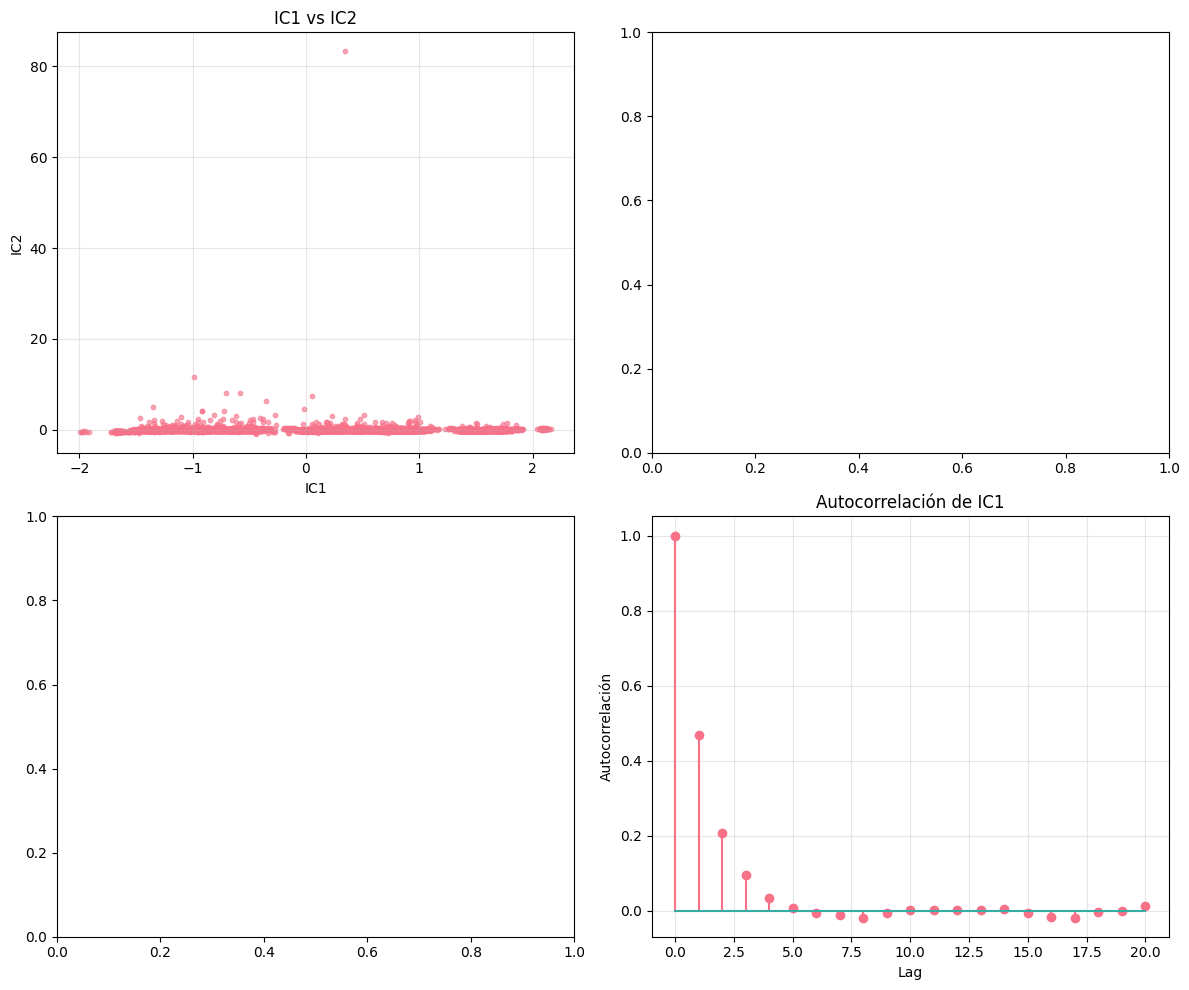

In [54]:
if n_components_optimo >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Scatter plots de pares de componentes
    axes[0, 0].scatter(S[:, 0], S[:, 1], alpha=0.6, s=10)
    axes[0, 0].set_xlabel('IC1')
    axes[0, 0].set_ylabel('IC2')
    axes[0, 0].set_title('IC1 vs IC2')
    axes[0, 0].grid(True, alpha=0.3)
    
    if n_components_optimo >= 3:
        axes[0, 1].scatter(S[:, 0], S[:, 2], alpha=0.6, s=10)
        axes[0, 1].set_xlabel('IC1')
        axes[0, 1].set_ylabel('IC3')
        axes[0, 1].set_title('IC1 vs IC3')
        axes[0, 1].grid(True, alpha=0.3)
    
    if n_components_optimo >= 4:
        axes[1, 0].scatter(S[:, 1], S[:, 2], alpha=0.6, s=10)
        axes[1, 0].set_xlabel('IC2')
        axes[1, 0].set_ylabel('IC3')
        axes[1, 0].set_title('IC2 vs IC3')
        axes[1, 0].grid(True, alpha=0.3)
    
    if n_components_optimo >= 1:
        autocorr = acf(S[:, 0], nlags=20)
        axes[1, 1].stem(range(len(autocorr)), autocorr)
        axes[1, 1].set_xlabel('Lag')
        axes[1, 1].set_ylabel('Autocorrelación')
        axes[1, 1].set_title('Autocorrelación de IC1')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [55]:
# Guardar dataset transformado
df_ica.to_csv('dataset_ica_transformado.csv', index=False)

# Guardar matriz de mezcla
loadings_ica.to_csv('matriz_mezcla_ica.csv')

# Guardar información de componentes
component_info = pd.DataFrame({
    'component': [f'IC{i+1}' for i in range(n_components_optimo)],
    'kurtosis': [stats.kurtosis(S[:, i]) for i in range(n_components_optimo)],
    'skewness': [stats.skew(S[:, i]) for i in range(n_components_optimo)],
    'std': [np.std(S[:, i]) for i in range(n_components_optimo)]
})
kurtosis_ica = np.mean(np.abs(stats.kurtosis(S, axis=0)))
component_info.to_csv('informacion_componentes_ica.csv', index=False)

print("\n✅ Análisis ICA completado!")
print(f"✅ Dimensionalidad reducida de {df_numeric.shape[1]} a {n_components_optimo} componentes independientes")
print(f"✅ Curtosis promedio: {kurtosis_ica:.4f}")
print(f"✅ Archivos guardados:")
print("   - dataset_ica_transformado.csv")
print("   - matriz_mezcla_ica.csv")
print("   - informacion_componentes_ica.csv")


✅ Análisis ICA completado!
✅ Dimensionalidad reducida de 82 a 2 componentes independientes
✅ Curtosis promedio: 3053.1213
✅ Archivos guardados:
   - dataset_ica_transformado.csv
   - matriz_mezcla_ica.csv
   - informacion_componentes_ica.csv
